In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 10
np.random.seed(42)

In [0]:
def dataset(n = 100, over=5):
  
  beta=0.5
  v_2 = np.random.randn()
  v_1 = np.random.randn()
  
  x = []
  for i in range(n+over+1):
    
    v =  np.random.randn()
    
    x.append( v + beta*v_1*v_2)
    v_2 = v_1
    v_1 = v
  
  output = x[0:n]
  for i in range(over+1):
    
    output = np.c_[output, x[i+1:n+i+1] ]
    
  
  return output

In [54]:
n=100
over=10
dt = dataset(n=n, over=over)
dt.shape

(100, 12)

In [70]:
x_train = dt[:,:over]
y_train = dt[:,over]

x_test = dt[:,1:over+1]
y_test = dt[:,over+1]

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))


#y_train = np.reshape(y_train, (y_train.shape[0], 1, testX.shape[1]))



x_test.shape


(100, 1, 10)

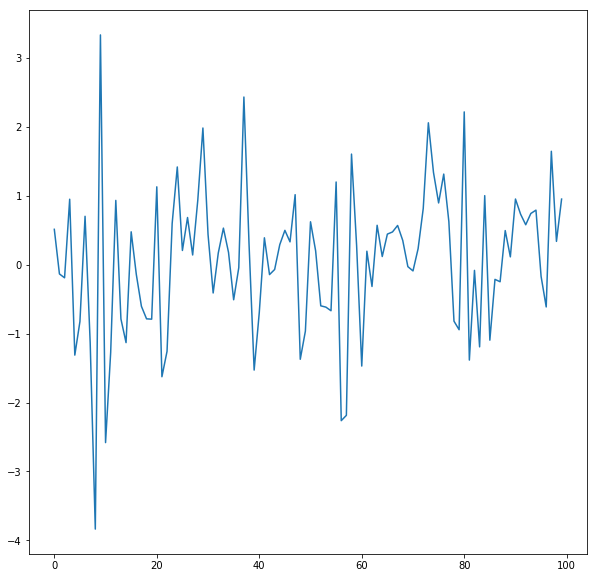

In [71]:
plt.plot(range(n), dt[:,over-1])

In [0]:
from keras import models, layers

In [0]:
model = models.Sequential()


model.add(layers.SimpleRNN(units=16, activation='tanh', input_shape=(1, x_train.shape[2])))
#model.add(layers.Dense(4))
model.add(layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [74]:
hist = model.fit(x_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
100/100 [==============================] - 1s 5ms/step - loss: 1.8098
Epoch 2/300
100/100 [==============================] - 0s 1ms/step - loss: 1.4163
Epoch 3/300
100/100 [==============================] - 0s 1ms/step - loss: 1.2069
Epoch 4/300
100/100 [==============================] - 0s 1ms/step - loss: 1.0995
Epoch 5/300
100/100 [==============================] - 0s 1ms/step - loss: 1.0447
Epoch 6/300
100/100 [==============================] - 0s 1ms/step - loss: 1.0039
Epoch 7/300
100/100 [==============================] - 0s 1ms/step - loss: 0.9823
Epoch 8/300
100/100 [==============================] - 0s 1ms/step - loss: 0.9646
Epoch 9/300
100/100 [==============================] - 0s 1ms/step - loss: 0.9472
Epoch 10/300
100/100 [==============================] - 0s 1ms/step - loss: 0.9263
Epoch 11/300
100/100 [==============================] - 0s 1ms/step - loss: 0.9184
Epoch 12/300
100/100 [==============================] - 0s 1ms/step - loss: 0.9087
Epoch 13/300


In [0]:
model.save("Q3_mode.h5")

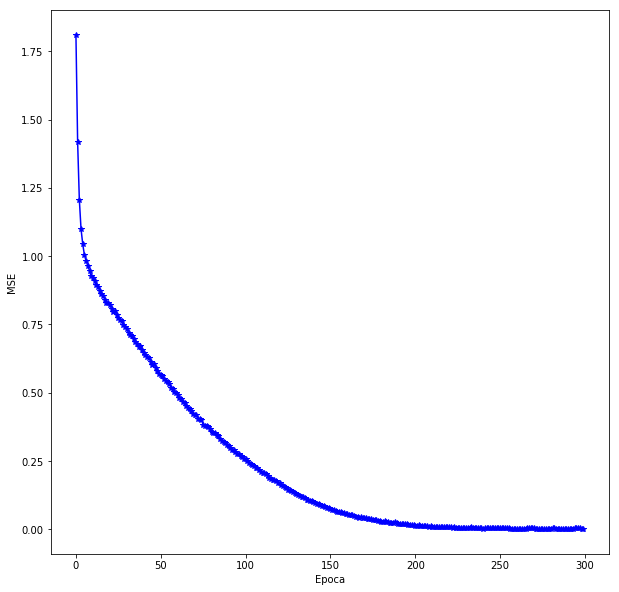

In [76]:
mse = hist.history['loss']

plt.plot(range(len(mse)), mse, 'b*-')
plt.xlabel("Epoca")
plt.ylabel("MSE")
plt.savefig("Q3_error.png")

In [77]:
pred = model.predict(x_test)
pred.shape

(100, 1)

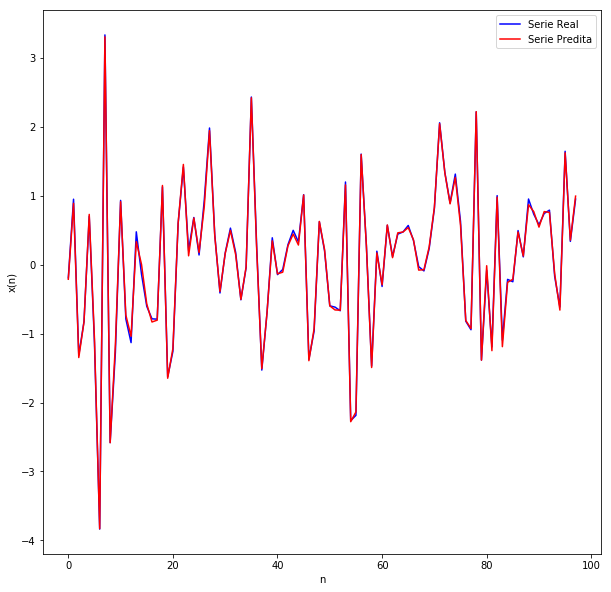

In [84]:
plt.plot(range(n-2), y_test[:-2], "b", label="Serie Real")
plt.plot(range(n-2), pred[:-2], "r", label="Serie Predita")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.legend()
plt.savefig("Q3_serie_real_predita.png", dpi=300)

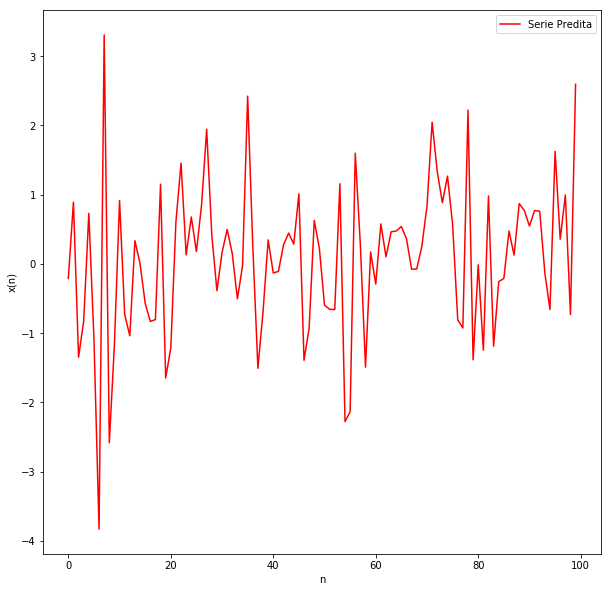

In [79]:
plt.plot(range(n), pred, "r", label="Serie Predita")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.legend()
plt.savefig("Q3_serie_predita.png", dpi=300)

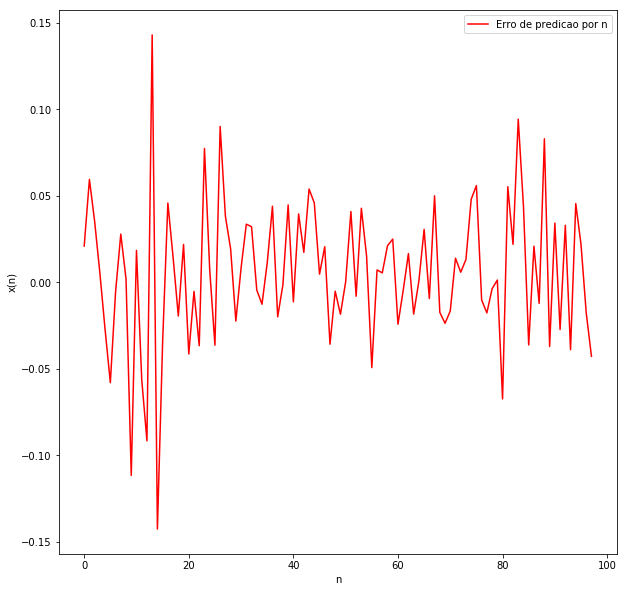

In [85]:
erro = y_test.reshape(len(y_test), 1) - pred

plt.plot(range(n-2), erro[:-2], "r", label="Erro de predicao por n")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.legend()
plt.savefig("Q3_erro_serie.png", dpi=300)

In [86]:
var_real = y_train.var()
var_pred = pred.var()

print(f"variancia real: {var_real}")
print(f"variancia predita: {var_pred}")

variancia real: 1.198740048981821
variancia predita: 1.246370553970337
